#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")

## Convert the image to grayscale
img = cv2.resize(img, None, fx=0.6, fy=0.6)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Improve contrast for better face detection
gray_img = cv2.equalizeHist(gray_img)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(
    gray_img,
    scaleFactor=1.1,
    minNeighbors=4,
    minSize=(18, 18)
)




# Define the text and font parameters
text = "Face"                     ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5                  ## Font scale factor
font_color = (0, 0, 255)          ## Text color in BGR (Red)
font_thickness = 1                ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # Use cv2.putText to add the text to the image
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


c:\Users\Adity\anaconda3\envs\cvlab\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


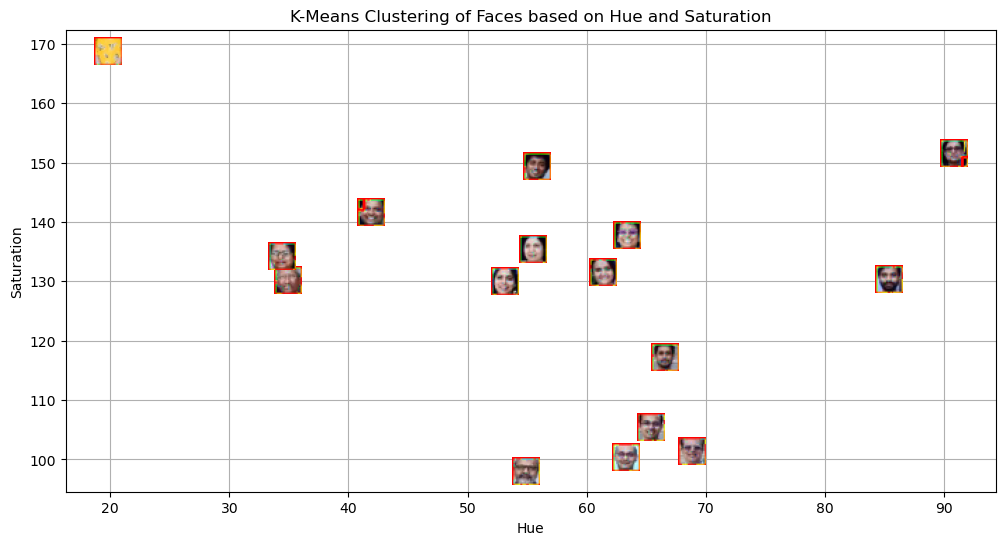

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  ## call the img and convert it from BGR to HSV and store in img_hsv

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)

#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("K-Means Clustering of Faces based on Hue and Saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show()


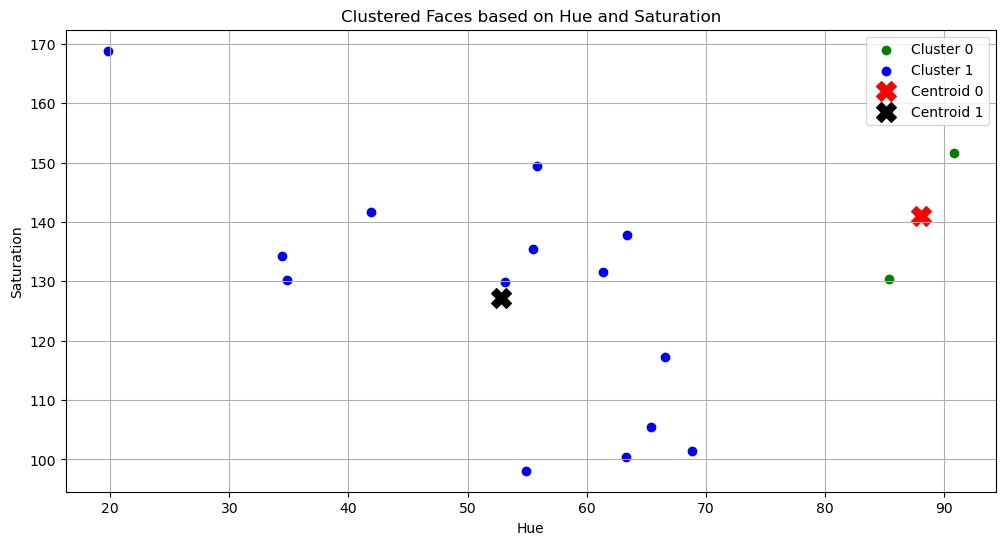

In [6]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=200, c='red', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=200, c='black', label='Centroid 1')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clustered Faces based on Hue and Saturation")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.show()


In [7]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 4, minSize=(30,30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


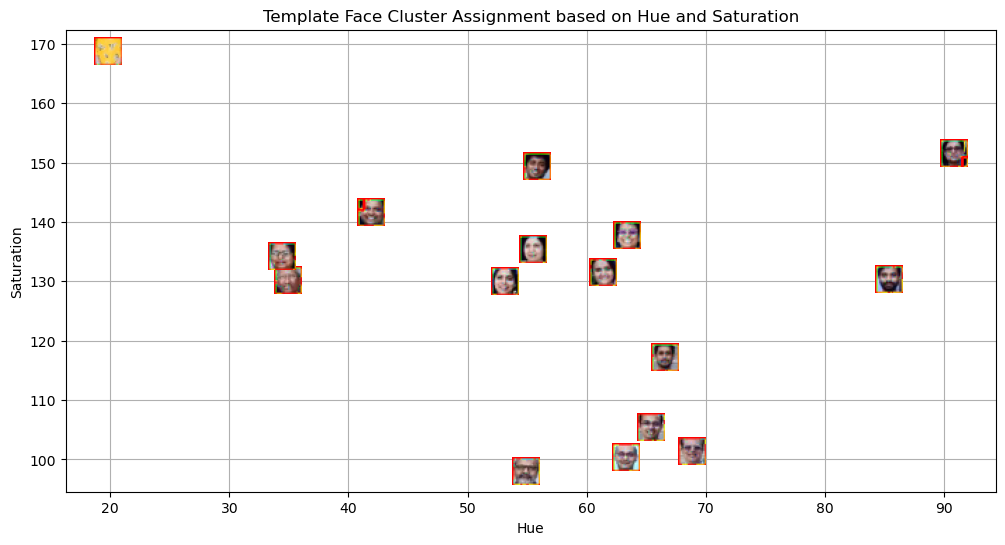

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Template Face Cluster Assignment based on Hue and Saturation")

## Add grid
plt.grid(True)

## show plot
plt.show()


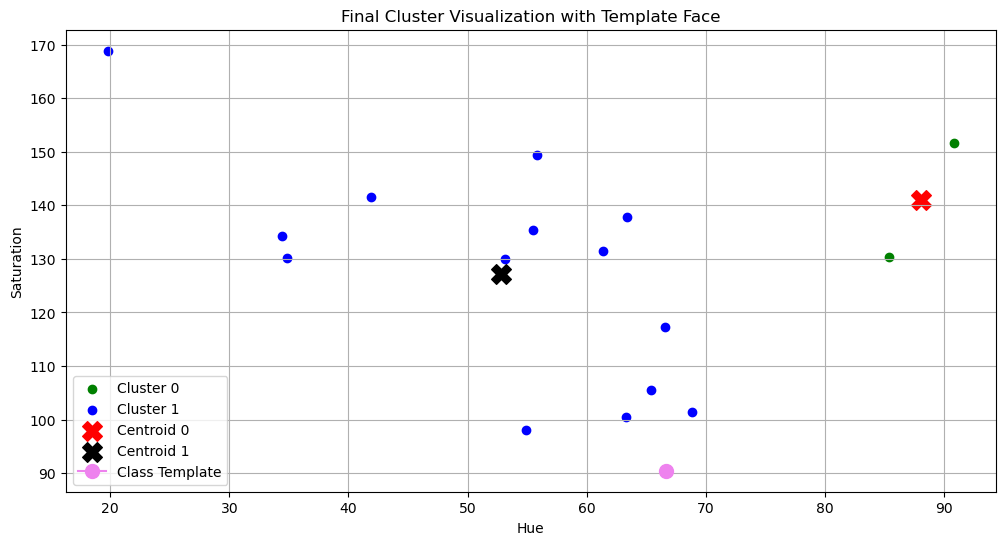

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1],
            c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],
            c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1],
            marker='X', s=200, c='red', label='Centroid 0')   ## plot for centroid 0

plt.scatter(centroid_1[0], centroid_1[1],
            marker='X', s=200, c='black', label='Centroid 1') ## plot for centroid 1

plt.plot(template_hue, template_saturation,
         marker='o', c='violet', markersize=10,
         label='Class Template')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Final Cluster Visualization with Template Face")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Ans1.Common distance metrics used in distance-based classification algorithms include:
Euclidean Distance – Measures straight-line distance between two data points; most commonly used in KNN and K-Means.

1.Manhattan Distance – Sum of absolute differences between feature values; useful for grid-based or independent features.

2.Minkowski Distance – Generalized distance metric that includes Euclidean and Manhattan distances as special cases.

3.Cosine Distance – Measures the angle between vectors; suitable for high-dimensional data like text.

4.Mahalanobis Distance – Accounts for feature correlation and data variance; useful for correlated datasets.

5.Hamming Distance – Counts differing positions between binary or categorical feature vectors.

Ans2.Distance-based classification algorithms find their main application in real-world situations where data sample similarity aids decision-making processes. The algorithms utilize distance measurements between data points to analyze feature space data, which enables them to execute multiple domains through their pattern identification and classification abilities.

1.Face recognition systems use facial feature distance comparison to identify distinct individuals.

2.Recommendation systems use similarity analysis between users and items to recommend movies, products, and music.

3.Medical diagnosis systems use patient symptom assessment to classify diseases based on established medical records.

4.Image classification systems identify images and categorize them based on their visual resemblance.

5.Text classification systems use feature distance measurement to identify document categories and find related articles.

6.Fraud detection systems identify suspicious transactions through analysis of deviations from standard transactional patterns.

7.Speech recognition systems convert spoken words into their equivalent stored speech patterns.

8.Customer segmentation identifies customer groups that exhibit matching purchasing patterns for marketing research purposes.

Ans3. Distance metrics serve as mathematical tools which enable the evaluation of similarity or dissimilarity between data points within a feature space. The selection of different metrics depends on both the specific characteristics of the data and the requirements of the problem which needs to be solved.

1.Euclidean Distance – This metric calculates the direct path distance which exists between two spatial points. It functions as the primary distance metric which KNN and K-Means algorithms use to operate with continuous numerical data.

2.Manhattan Distance – This measurement calculates total absolute differences between different feature values. The method proves beneficial when people navigate through grid-based systems and when people use separate features for their tasks.

3.Minkowski Distance – This distance measurement method enables general distance calculations which include two specific distance methods through the use of distance parameter p.

4.Cosine Distance – This metric determines the angle between two vectors by measuring the distance between them. The method finds extensive application in text mining and high-dimensional data analysis because researchers need to understand directional patterns in data sets.

5.Halamanobis Distance – The measurement method uses feature correlation data to determine distance scales which make this method appropriate for datasets containing related features.

6.Hamming Distance – The method counts how many spots two binary or categorical vectors show differences which people use for detecting errors and analyzing categorical data.

Ans4.Cross-validation serves as a method for assessing the predictive accuracy of machine learning models when presented with new data. The dataset undergoes division into several smaller subsets which are known as folds instead of being tested through a single train-test split. The model undergoes training on selected folds while assessment occurs through the remaining fold which results in multiple evaluations that produce an average outcome. The method delivers a more precise assessment of model capabilities while it protects against overfitting and assists in choosing the optimal model together with the appropriate hyperparameter settings. Cross-validation strengthens model training by using all data points for training and validation during distinct phases of the process.

Ans5.The selection of 𝐾 K in K-Nearest Neighbors KNN creates a direct connection between bias variance and model performance which affects prediction results. 

The model introduces bias because it relies on basic assumptions which exceed the necessary level of model complexity. The KNN model generates less variable decision boundaries when it selects a high K value because it calculates average distances to multiple neighboring points. The model develops high bias together with underfitting because it fails to recognize critical local data patterns while maintaining low sensitivity to minor data changes.

The model exhibits variance because its output results change when there are minor adjustments in its training dataset. The model learns to depend on its immediate data points when K takes its minimum value of 1 because it uses those points to predict its training dataset. The system creates decision boundaries that reach extreme complexity, which makes the system susceptible to random data fluctuations, resulting in excessive model complexity and performance degradation.

KNN establishes a bias–variance tradeoff which operates as follows: 

Small 𝐾

K → low bias, high variance

Large 𝐾

K → high bias, low variance

The cross-validation process for determining the ideal value of 𝐾 K establishes a midpoint between bias and variance which enhances model ability to generalize.